# Pregunta 1

## a)

In [29]:
import urllib
import pandas as pd

#train_data_url = "http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/vowel.train"
#test_data_url = "http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/vowel.test"
#train_data_f = urllib.urlretrieve(train_data_url, "train_data.csv")
#test_data_f = urllib.urlretrieve(test_data_url, "test_data.csv")

train_df = pd.DataFrame.from_csv('train_data.csv',header=0,index_col=0)
test_df = pd.DataFrame.from_csv('test_data.csv',header=0,index_col=0)

n_train = len(train_df)
print n_train
#train_df.head()
#test_df.tail()

528


## b)

In [2]:
from sklearn.preprocessing import StandardScaler

X = train_df.ix[:,'x.1':'x.10'].values
y = train_df.ix[:,'y'].values
X_std = StandardScaler().fit_transform(X)

## c)

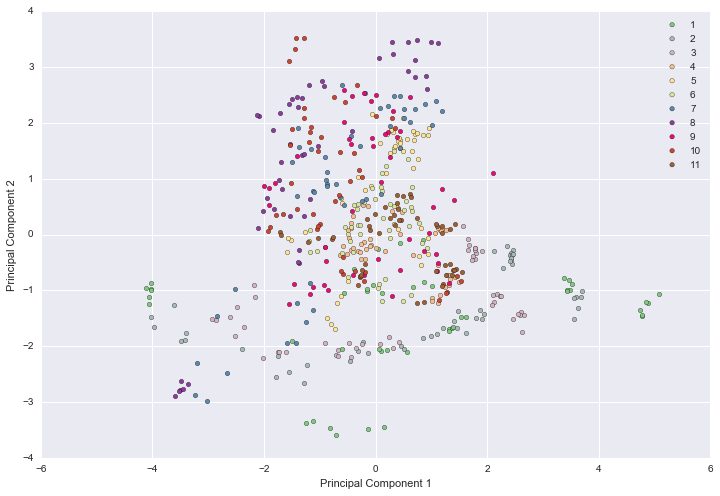

In [8]:
%matplotlib inline

from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

sklearn_pca = PCA(n_components=2)
Xred_pca = sklearn_pca.fit_transform(X_std)

sklearn_pca2 = PCA()
model = Xred_pca


lda = LDA(solver="svd", store_covariance=True)
    y_pred = lda.fit(X, y).predict(X)


cmap = plt.cm.get_cmap('Accent')
mclasses=(1,2,3,4,5,6,7,8,9,10,11)
mcolors = [cmap(i) for i in np.linspace(0,1,12)]
plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_pca[y==lab, 0],Xred_pca[y==lab, 1],label=lab,c=col)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

## d)

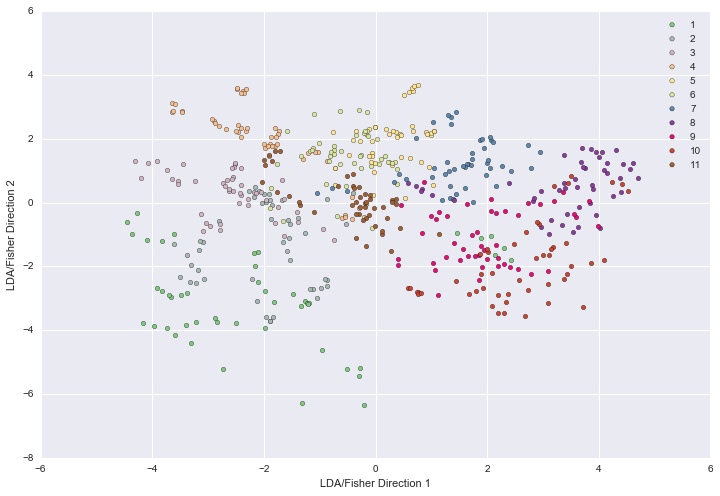

LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [85]:
from sklearn.lda import LDA

sklearn_lda = LDA(n_components=2)
Xred_lda = sklearn_lda.fit_transform(X_std,y)
cmap = plt.cm.get_cmap('Accent')
mclasses=(1,2,3,4,5,6,7,8,9,10,11)
mcolors = [cmap(i) for i in np.linspace(0,1,12)]
plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_lda[y==lab, 0],Xred_lda[y==lab, 1],label=lab,c=col)
    
plt.xlabel('LDA/Fisher Direction 1')
plt.ylabel('LDA/Fisher Direction 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

## e)

## f)

In [82]:
import random

def a_priori_classifier(x):
    return random.choice(y)

# test:
l = []
n=10000
for i in range(n):
    l = l + [a_priori_classifier("test")]
    
import collections

counter=collections.Counter(l)

for i in counter:
    print counter[i]/float(n)

0.093
0.0859
0.0912
0.089
0.0923
0.09
0.0962
0.0849
0.0918
0.0908
0.0949


## g)

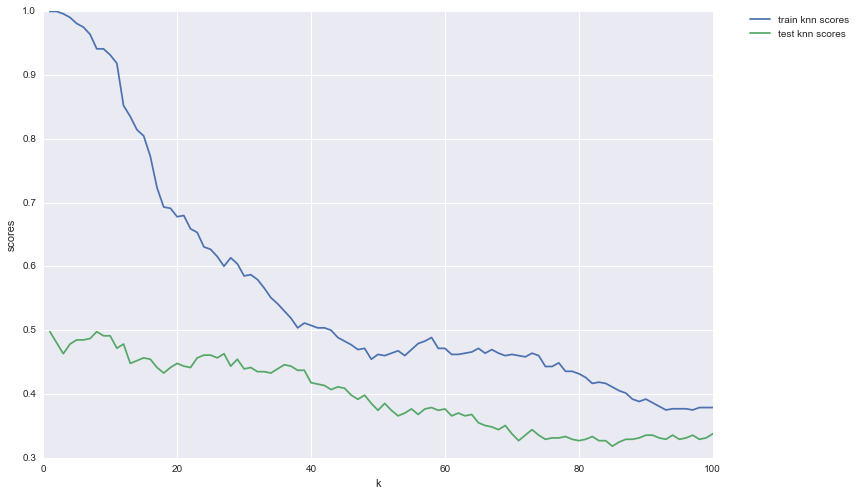

In [124]:
from sklearn.lda import LDA
from sklearn.qda import QDA
from sklearn.neighbors import KNeighborsClassifier

Xtest = test_df.ix[:,'x.1':'x.10'].values
ytest = test_df.ix[:,'y'].values

X_std_test = StandardScaler().fit_transform(Xtest)

#LDA
lda_model = LDA()
lda_model.fit(X_std,y)

train_lda_score = lda_model.score(X_std,y)
test_lda_score = lda_model.score(X_std_test,ytest)

#QDA
qda_model = QDA()
qda_model.fit(X_std,y)

train_qda_score = qda_model.score(X_std,y)
test_qda_score = qda_model.score(X_std_test,ytest)

#k-NN
limit_k = 101
train_knn_scores_list = []
test_knn_scores_list = []
for k in range(1,limit_k):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_std,y)

    train_knn_score = knn_model.score(X_std,y)
    test_knn_score = knn_model.score(X_std_test,ytest)

    train_knn_scores_list.append(train_knn_score)
    test_knn_scores_list.append(test_knn_score)

plt.figure(figsize=(12, 8))
plt.plot(range(1,limit_k), train_knn_scores_list, label="train knn scores")
plt.plot(range(1,limit_k), test_knn_scores_list, label="test knn scores")
plt.ylabel('scores')
plt.xlabel('k')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## h)

## i)